# End to end machine learning workflow example



In [142]:
# import the dataset
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [144]:
# get our dataset
iris_dataset = load_iris()
# returns a new type of object, called a bunch object -> very similar to a dictionary
# let's put all the data we need in  a more confortable manner -> pandas dataframe
features = pd.DataFrame(iris_dataset['data'], columns = iris_dataset['feature_names'])
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [145]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [146]:
labels = pd.DataFrame(iris_dataset['target'], columns = ['target'])

In [151]:
labels.sample(5)

,target
128,2
66,1
6,0
108,2
63,1


In [152]:
final = pd.concat([features, labels], axis = 1)
final.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


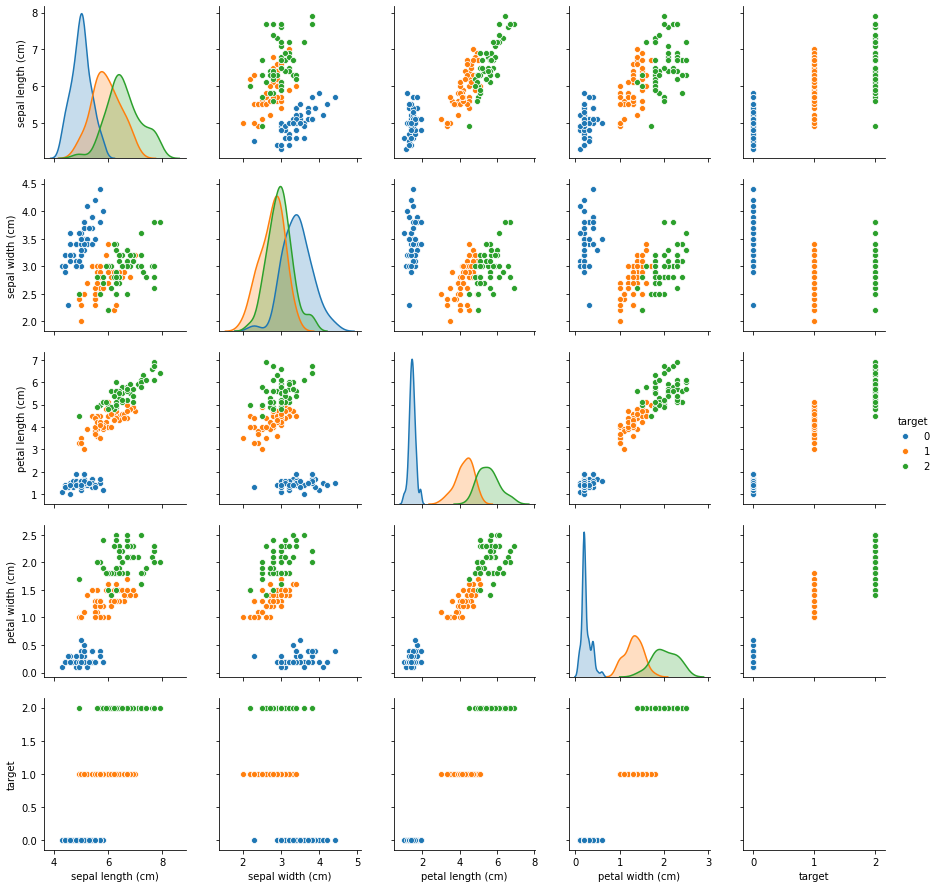

In [153]:
import seaborn as sns
import matplotlib as plt

sns.pairplot(final, hue = 'target')


In [154]:
# Let's get to the machine learning part!!

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state = 0, test_size = 0.25)


In [155]:
y_test.shape
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

![](https://miro.medium.com/max/1222/1*wW8O-0xVQUFhBGexx2B6hg.png)

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.


![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

In [156]:
# fit our data to magical object

knn.fit(X_train, y_train)

# your model is ready to make predictions!!! 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# evaluate my model on test data

# just to see the model in action
# knn.predict([[1,1,1,1]])

In [157]:
# evaluate our fit model compared to our test dataset

y_predict = knn.predict(X_test)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [158]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [159]:
knn.score(X_test, y_test)



0.9736842105263158

In [160]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Text(0, 0.5, 'Error Rate')

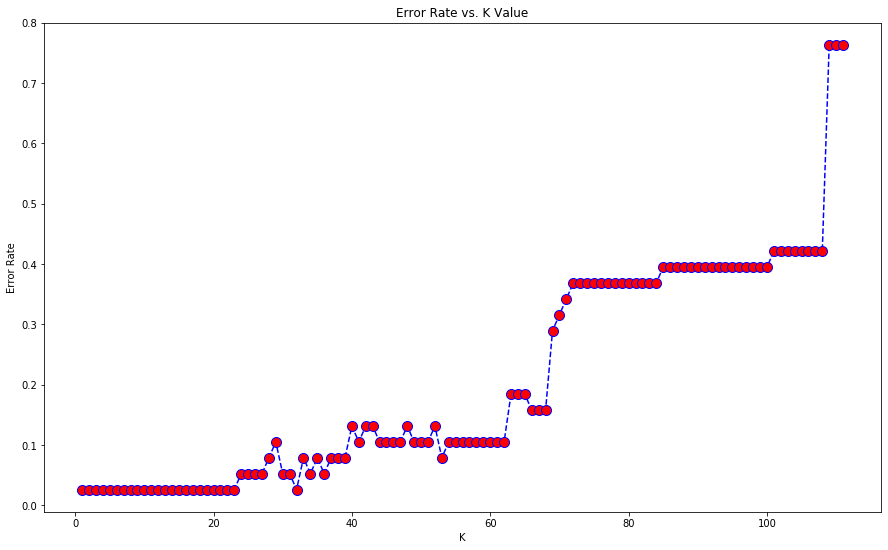

In [164]:
import matplotlib.pyplot as plt
error_rate = []
rangenumb = 112
# Will take some time
for i in range(1,rangenumb):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(15,9))
plt.plot(range(1,rangenumb),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [162]:
listl = [1,5,10,20,50,100,112]
for i in listl:
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state = 0, test_size = 0.25)
    y_test.shape
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    print(1-knn.score(X_test, y_test))

1
0.02631578947368418
5
0.02631578947368418
10
0.02631578947368418
20
0.02631578947368418
50
0.10526315789473684
100
0.39473684210526316
112
0.7631578947368421


In [ ]:
sns.pairplot(final, hue = 'target')
